In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data() #Ignoring Labels as we are performing Reconstruction
# Flatten the images to use with PCA
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))
# Convert to float64 and Standardize
X_train = X_train_flat.astype("float64") / 255
X_test = X_test_flat.astype("float64") / 255

In [14]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
# Define the dimensions of latent variables
latent_dimensions = [2, 4, 8, 16, 32, 64]

In [8]:
def train_pca_model(Xtrain,Xtest,latent_dim):
    pca = PCA(n_components=latent_dim)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    Xreconstructed = pca.inverse_transform(X_test_pca)

    # Calculate Mean Squared Error (MSE) for each component and then take the mean
    mse = (np.square(X_test - Xreconstructed).sum(axis=1)/784).mean()
    return mse, Xreconstructed

In [9]:
def show_img(Xtest, Xreconstructed):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    # Display original images in the first row
    for i in range(5):
        axes[0, i].imshow(Xtest[i].reshape(28,28),cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title(f'Image {i + 1}')

    # Display reconstructed images in the second row
    for i in range(5):
        axes[1, i].imshow(Xreconstructed[i].reshape(28,28),cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title(f'Reconstructed Image {i + 1}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

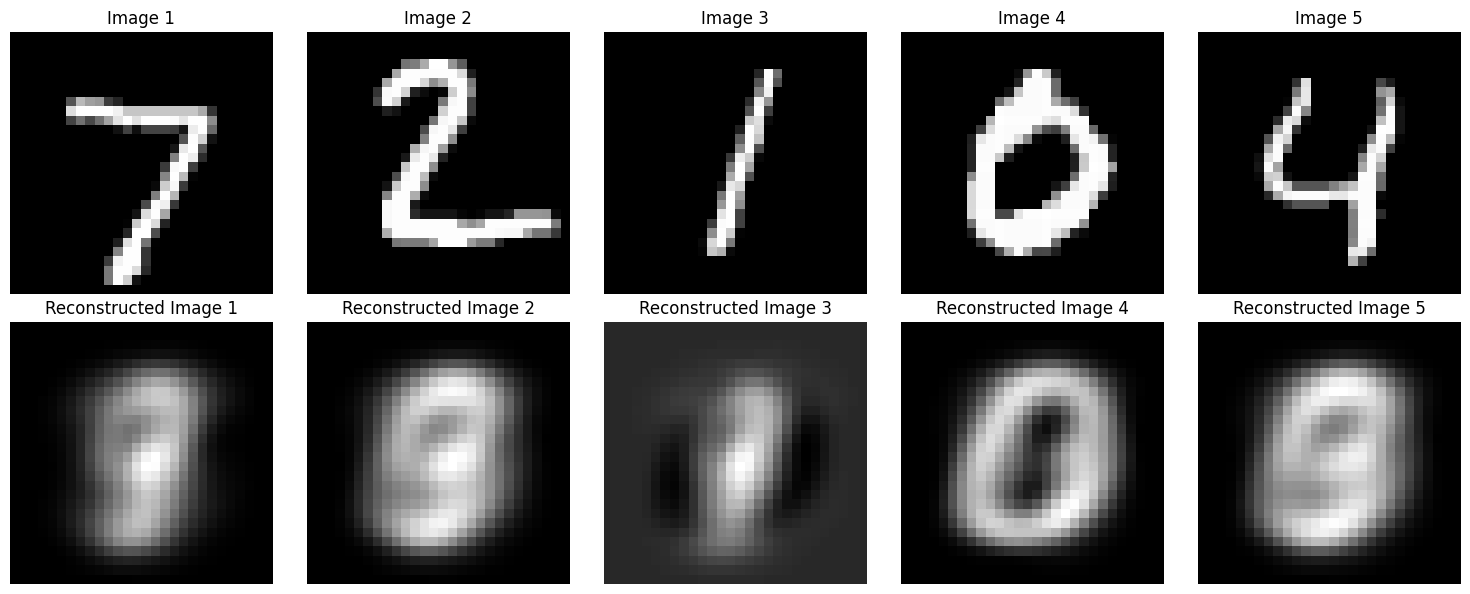

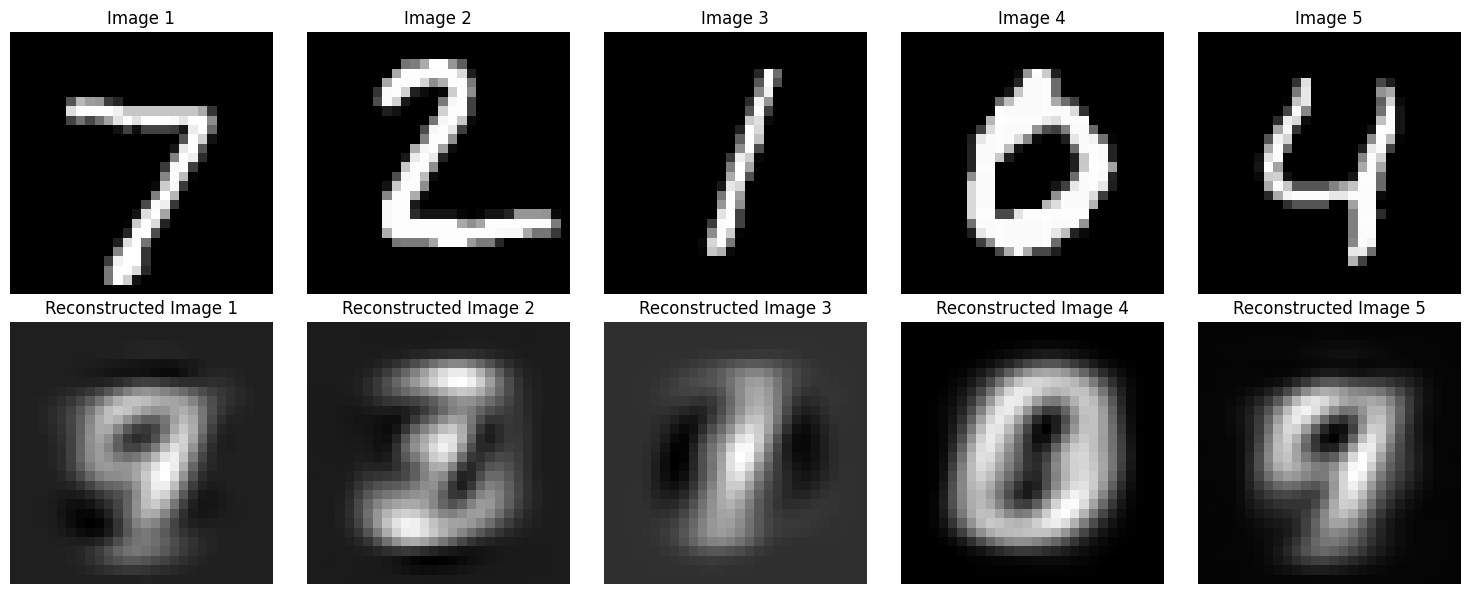

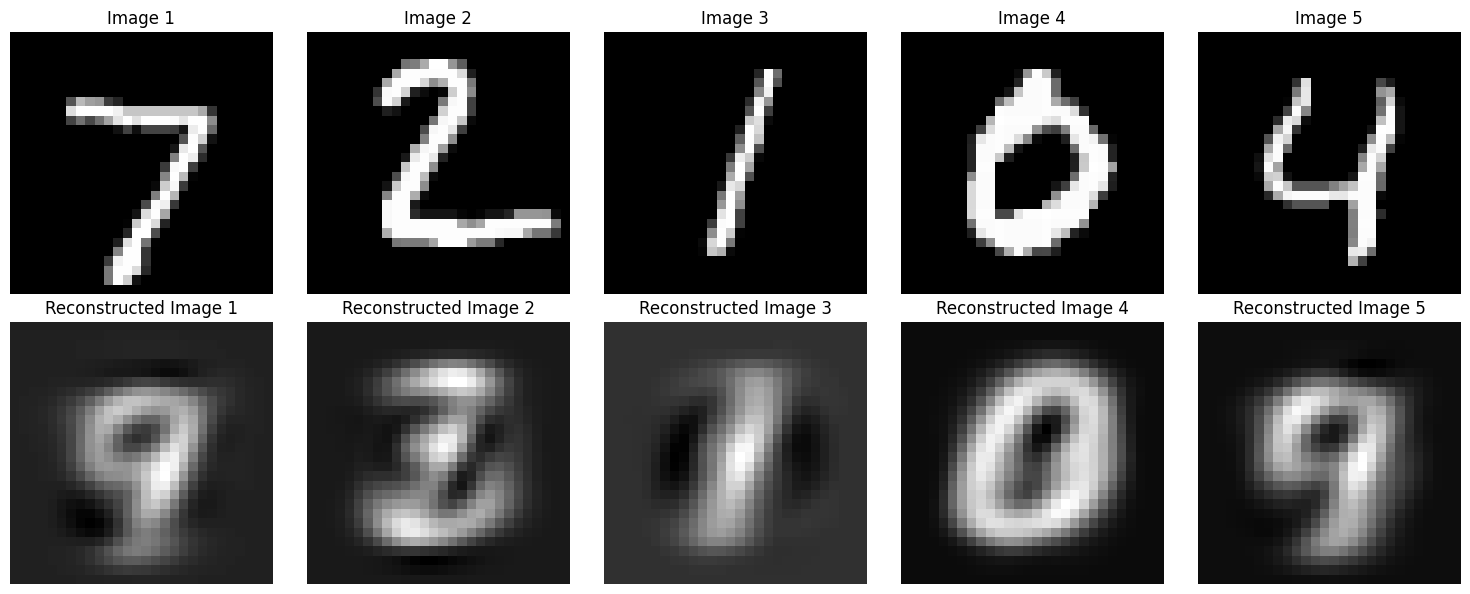

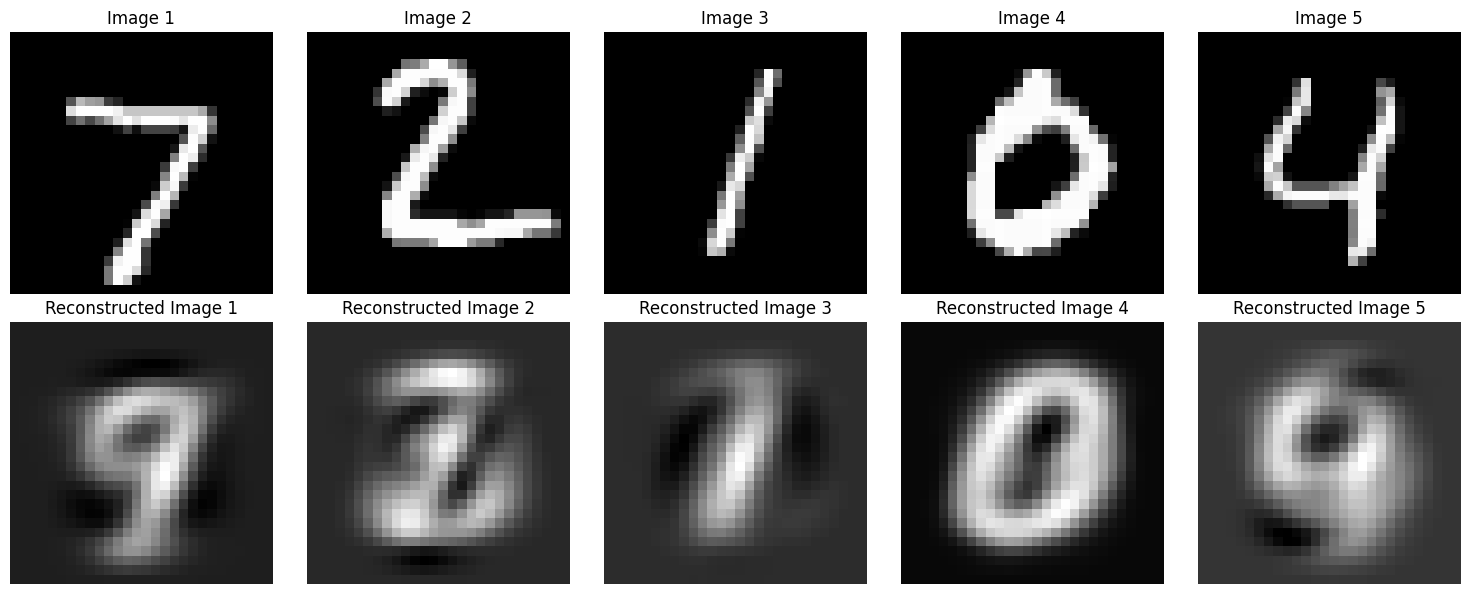

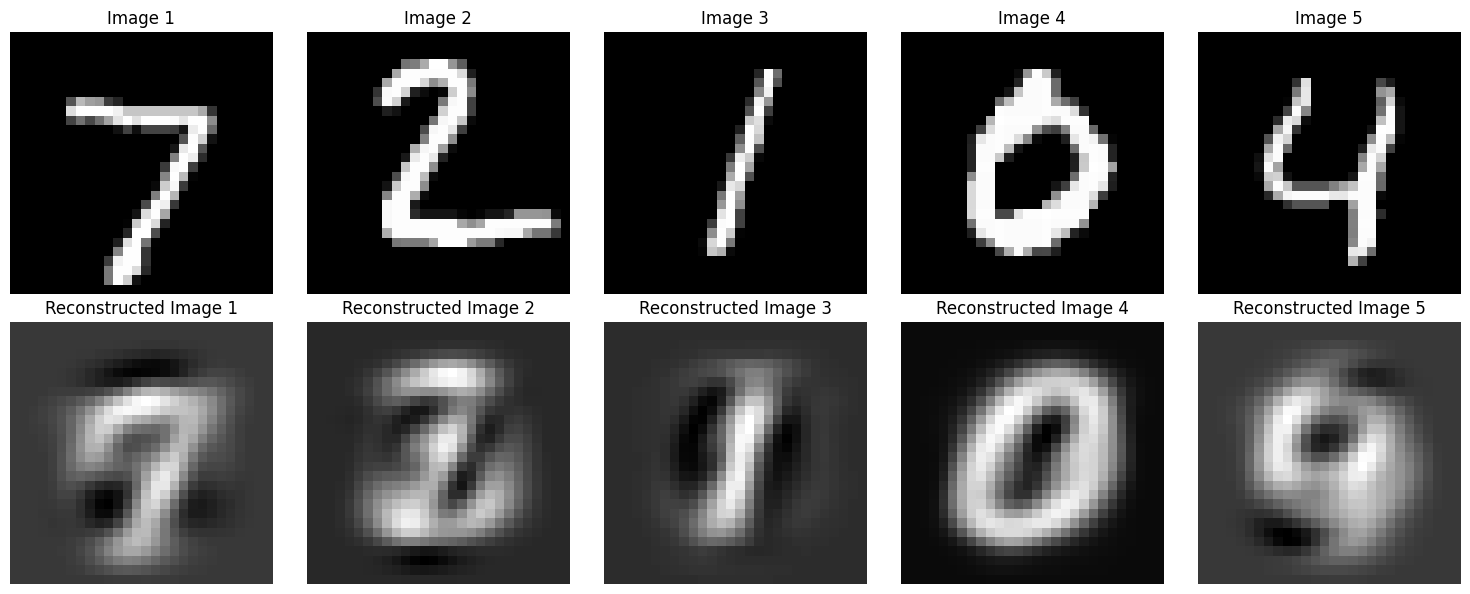

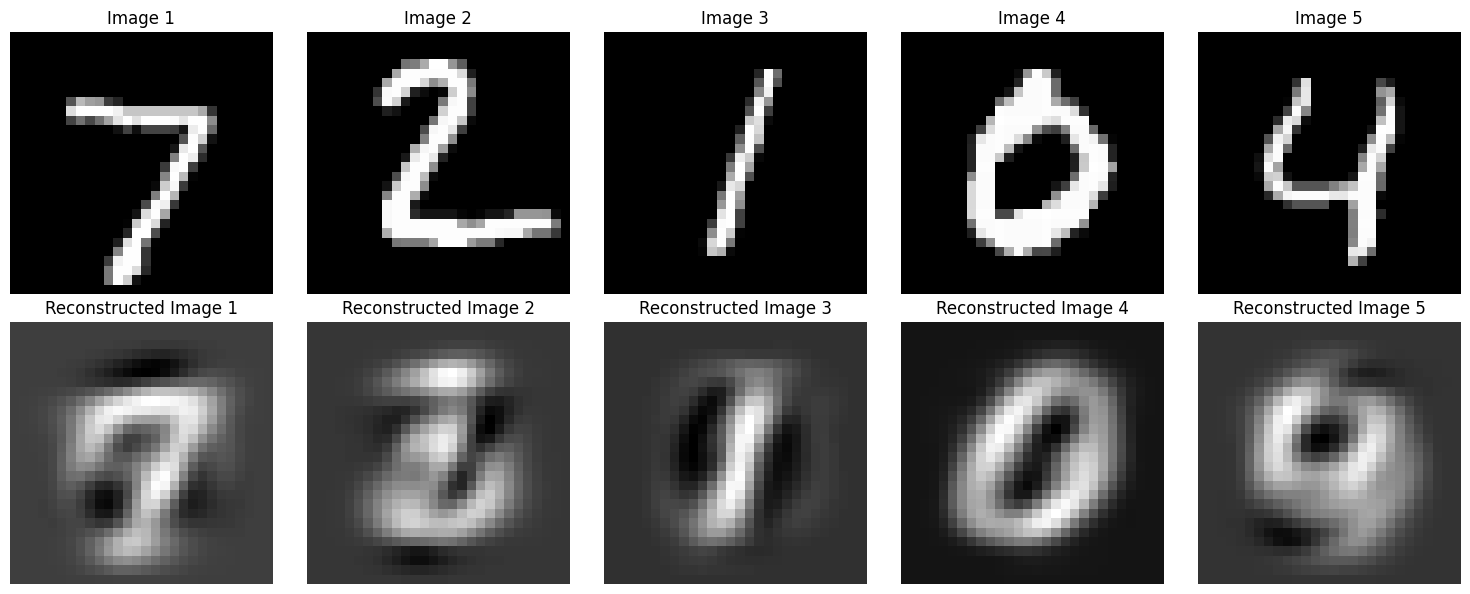

In [10]:
all_mse = []
all_x_reconstructed = []
for ld, dim in enumerate(latent_dimensions, 1):
    mse , X_reconstructed = train_pca_model(X_train,X_test,ld)
    all_mse.append(mse)
    all_x_reconstructed.append(X_reconstructed)
    show_img(X_test,X_reconstructed)

In [11]:
all_mse

[0.06073342687280476,
 0.05566949352767628,
 0.05160897386858222,
 0.047903431260122975,
 0.04452642275567603,
 0.04164708444191289]

In [12]:
all_x_reconstructed

[array([[-1.05813366e-17,  2.14641444e-19,  5.73013870e-19, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.59136366e-19, -1.33705209e-20, -3.56943830e-20, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.01268990e-17,  6.11121390e-19,  1.63146979e-18, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-8.60413757e-18,  1.74534144e-19,  4.65942099e-19, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.00005201e-17,  2.02859636e-19,  5.41560768e-19, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.31957688e-17, -6.73373133e-19, -1.79765910e-18, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[-3.95213825e-17, -7.29843631e-17,  1.26414087e-17, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.54084355e-17,  9.00679389e-17, -1.56783952e-17, ...,
          0.00000000e+00,  0.00000000e